In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import json
import pickle
import mmcv
import utils
import numpy as np
import pandas as pd
import evaluation
import detection
import datasets
import visualization

In [2]:
name = "cm_rcnn_10164_poly"
filename = "eval_result.pkl"
cfg = './cfg/cm_rcnn_10164.py'
chp = '../work_dirs/cm_rcnn_10164_poly/latest.pth'
output = '../detection/cm_rcnn_10164_poly/eval_result.json'
root = '../detection/cm_rcnn_10164_poly'
log_path = "../work_dirs/cm_rcnn_10164_poly/20190426_121135.log"

load_type = "test"
coco_types = ["bbox", "segm"]
voc_types = "bbox"
thresh = [0.5, 0.75]

In [3]:
coco_dataset, concrete = datasets.load_dataset(cfg, load_type)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Preparing dataset ......
[Dataset is ready now !]


In [4]:
data, _, _, _ = evaluation.detect_and_coco_eval(cfg, chp, filename, eval_type=coco_types,
                                                name=name, params=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 9.4 task/s, elapsed: 30s, ETA:     0scm_rcnn_10164_poly detection datasets done!

Writing detected results to ../detection/cm_rcnn_10164_poly/eval_result.pkl
......
Writing done to pkl file: ../detection/cm_rcnn_10164_poly/eval_result.pkl

Writing formatted results to ../detection/cm_rcnn_10164_poly/eval_result.json
......
Writing done to json file: ../detection/cm_rcnn_10164_poly/eval_result.json

Starting evaluate bbox and segm ......
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.966
 Average Precision  (AP) @[ IoU=0.75      

In [5]:
gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *bbox* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 89.6 task/s, elapsed: 3s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_poly/bbox_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 449/449, 3203.9 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [449])file saved done in ../detection/cm_rcnn_10164_poly/bbox_dets.pkl
Ready to evaluate on *bbox* ...

TP: (2, 449)
FP: (2, 449)
FPR: (2, 449)
TPR: (2, 449)
AREA: [0.99417472 0.9638401 ] (2,)
AP [0.96911197 0.84899803] (2,)
voc formatted file save done![../detection/cm_rcnn_10164_poly/voc_bbox_0.5_0.75.pkl]


(2, 451) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_poly/bbox_pr.png]


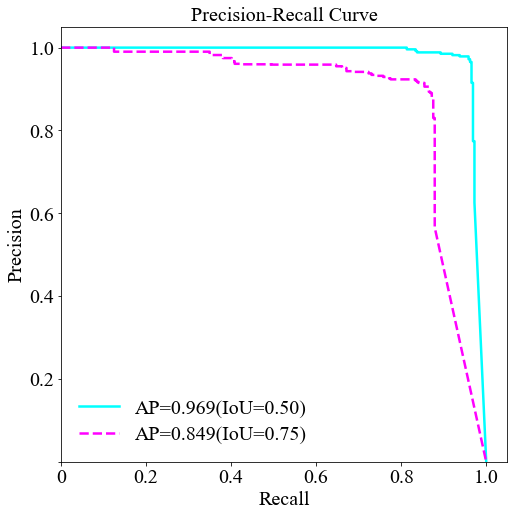


Multiple roc lines
Save done![../detection/cm_rcnn_10164_poly/bbox_roc.png]


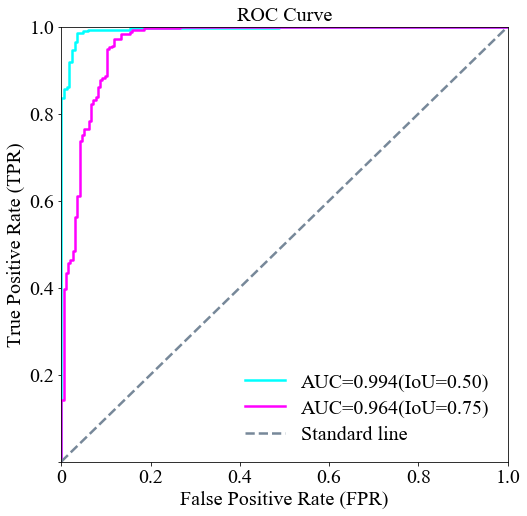

In [6]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [7]:
voc_types = "segm"

gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *segm* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 90.1 task/s, elapsed: 3s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_poly/segm_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 449/449, 1278.1 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [449])file saved done in ../detection/cm_rcnn_10164_poly/segm_dets.pkl
Ready to evaluate on *segm* ...

TP: (2, 449)
FP: (2, 449)
FPR: (2, 449)
TPR: (2, 449)
AREA: [0.94836811 0.79239374] (2,)
AP [0.87889292 0.298936  ] (2,)
voc formatted file save done![../detection/cm_rcnn_10164_poly/voc_segm_0.5_0.75.pkl]


(2, 451) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2, 451) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_poly/segm_pr.png]


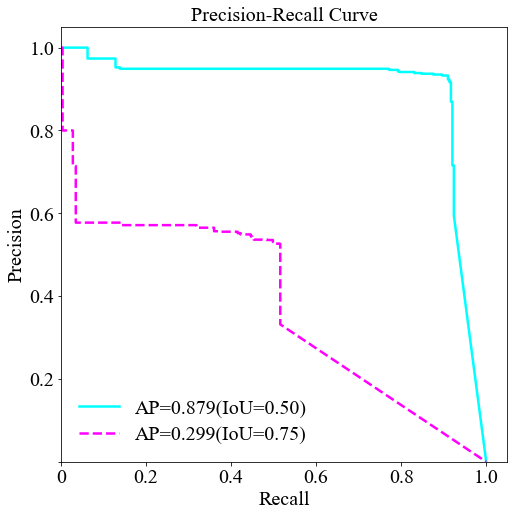


Multiple roc lines
Save done![../detection/cm_rcnn_10164_poly/segm_roc.png]


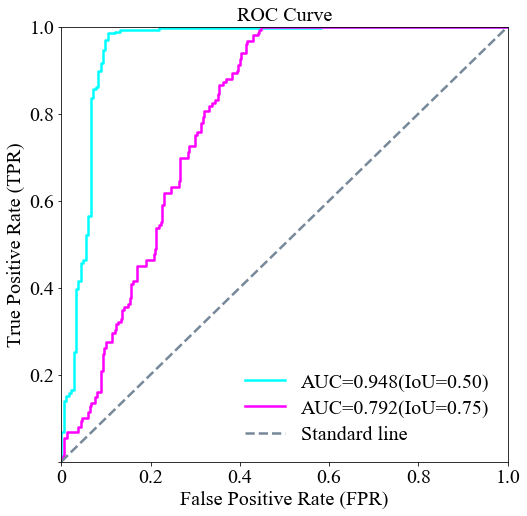

In [8]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [9]:
training = visualization.read_log(log_path)

In [10]:
training

{'name': 'cm_rcnn_10164_poly',
 'epochs': 12,
 'iters': 700,
 'loss': [1.3832,
  0.7889,
  0.7386,
  0.6347,
  0.7223,
  0.6979,
  0.5793,
  0.6238,
  0.5452,
  0.624,
  0.6098,
  0.5461,
  0.5773,
  0.5264,
  0.555,
  0.5506,
  0.5233,
  0.5421,
  0.5708,
  0.6185,
  0.5485,
  0.5122,
  0.5565,
  0.5313,
  0.589,
  0.5096,
  0.5206,
  0.5019,
  0.5052,
  0.4887,
  0.5185,
  0.4961,
  0.474,
  0.4992,
  0.492,
  0.4587,
  0.4709,
  0.482,
  0.4835,
  0.4663,
  0.4798,
  0.4667,
  0.4565,
  0.4498,
  0.4643,
  0.4527,
  0.4424,
  0.4657,
  0.4863,
  0.4344,
  0.4216,
  0.4443,
  0.439,
  0.4537,
  0.4508,
  0.4221,
  0.4508,
  0.4138,
  0.4229,
  0.41,
  0.3875,
  0.4111,
  0.4305,
  0.3891,
  0.3826,
  0.4118,
  0.4044,
  0.3968,
  0.3982,
  0.3933,
  0.3718,
  0.3798,
  0.3865,
  0.4064,
  0.3827,
  0.4026,
  0.3683,
  0.3928,
  0.3615,
  0.3894,
  0.3685,
  0.3862,
  0.3643,
  0.3706],
 'lr': [0.001,
  0.00117,
  0.00133,
  0.0015,
  0.00166,
  0.00183,
  0.002,
  0.00182,
  0.00196,

 Save done![../detection/cm_rcnn_10164_poly/learning_curve.png]


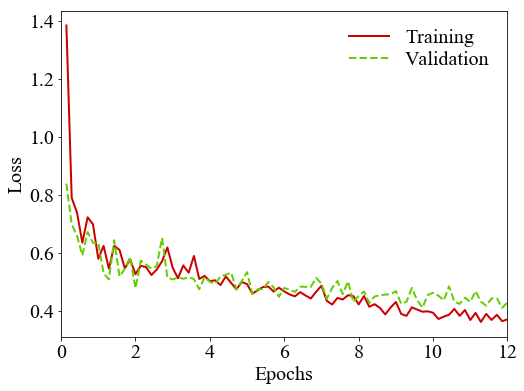

In [11]:
save_1 = True
path_1 = "../detection/cm_rcnn_10164_poly/learning_curve.png"

visualization.plot_training_curve(training, plot="loss", save=save_1, save_path=path_1)

 Save done![../detection/cm_rcnn_10164_poly/learing_rate.png]


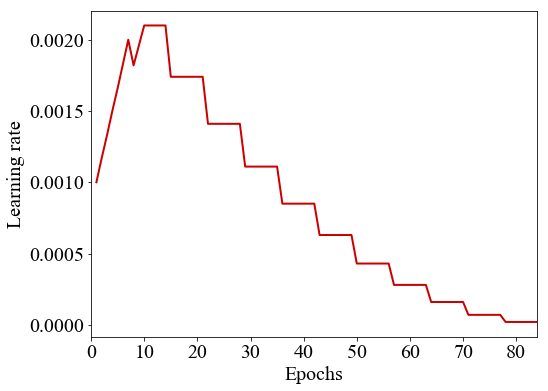

In [12]:
save_2 = True
path_2 = "../detection/cm_rcnn_10164_poly/learing_rate.png"

visualization.plot_training_curve(training, plot="lr", save=save_2, save_path=path_2)